In [1]:
import numpy as np
cov3 = np.loadtxt('finalized_linear_v6covariance.txt')

In [2]:
from sys_functions import *

#check diagonal-- if invertible/positive definite -- matrix with same dimentions
diag_cov = np.diagonal(cov3)
array = np.array(diag_cov)
# Create a diagonal matrix
diag_matrix = np.diag(array)
#print(diag_matrix)

invert = invertible(diag_matrix)
print(invert)

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


True


In [5]:
def invertible(matrix):
    import numpy
    from numpy import linalg
    invertible = 0
    #np.savetxt('covariance_example.txt', matrix)
    #print(type(matrix[0][0]))
    det = np.linalg.det(matrix)
    if det != 0:
        invertible = True
    else:
        invertible = False
        
    return invertible

In [6]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [3]:
#invert = invertible(diag_matrix)
pos = is_pos_def(cov3)
#print(invert)
print(pos)

False


In [27]:
def reconstruct(matrix):
    from numpy import linalg
    
    # w = eigenvalue, v = eigenvector
    w, v = linalg.eig(matrix)
    print(w)
    w_new = []
    for x in range(w.size):
        if w[x]<0:
            print(w[x])
            new = 0
        else:
            new = w[x]
        w_new.append(new)
    #print(w_new)
        
    # reconstruct matrix with new values:
    inv_v = np.linalg.pinv(v)
    mat_inv = np.matrix(inv_v)
    vec_w = np.array(w_new)
    #I = np.identity(12, dtype = float)
    Lambda = np.diag(vec_w)
    mat_v = np.matrix(v)
    cov = mat_v*Lambda*mat_inv
    
    #check if this worked:
    check = np.all(np.linalg.eigvals(cov) >= 0)
    if check == True:
        print("working properly")
    else: 
        print("need to fix")
    
    return cov

In [4]:
new = reconstruct(cov3)
#print(is_pos_def(new))

-1.2087776786993937e-08
working properly


In [53]:
mock0 = np.loadtxt('/fs/scratch/PCON0008/warner785/bwarner/mocks/mocks_second_set_pca0'+ '.txt')
mock0_1 = np.loadtxt('/fs/scratch/PCON0008/warner785/bwarner/mocks/mocks_set20_pca0'+ '.txt')

(700, 12)
700


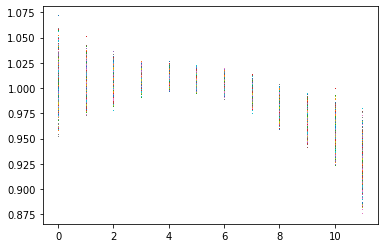

(700, 12)
700


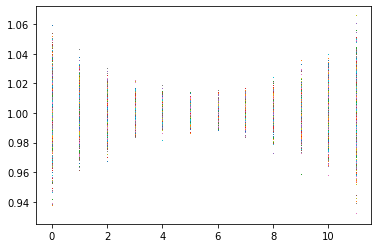

In [54]:
print(mock0.shape)

print(np.unique(mock0[:,0]).size)
from matplotlib import pyplot as plot
plot.plot(mock0.T, ',')
plot.show()

print(mock0_1.shape)

print(np.unique(mock0_1[:,0]).size)
from matplotlib import pyplot as plot
plot.plot(mock0_1.T, ',')
plot.show()

In [42]:
#w, v = linalg.eig(new)
#print(w)
inv_3 = np.linalg.pinv(cov3)
inv_new = np.linalg.pinv(new)
print(inv_3)
#print(inv_new)

[[-3.04494301e+05 -6.98767827e+05 -1.60029929e+06 -3.37711239e+06
  -5.73980309e+06 -7.15677655e+06 -6.19091331e+06 -3.80745258e+06
  -1.86824269e+06 -8.51524548e+05 -3.85161637e+05 -1.82116560e+05]
 [-6.98767827e+05 -1.58383059e+06 -3.64356598e+06 -7.68717271e+06
  -1.30639050e+07 -1.62915764e+07 -1.40937019e+07 -8.66675038e+06
  -4.25242325e+06 -1.93782876e+06 -8.76834129e+05 -4.14495323e+05]
 [-1.60029929e+06 -3.64356598e+06 -8.33613711e+06 -1.76183993e+07
  -2.99407140e+07 -3.73371216e+07 -3.22988703e+07 -1.98619645e+07
  -9.74652124e+06 -4.44090934e+06 -2.00966686e+06 -9.49875414e+05]
 [-3.37711239e+06 -7.68717271e+06 -1.76183993e+07 -3.71514175e+07
  -6.31887962e+07 -7.87964036e+07 -6.81623340e+07 -4.19168503e+07
  -2.05686818e+07 -9.37131274e+06 -4.24136058e+06 -2.00445665e+06]
 [-5.73980309e+06 -1.30639050e+07 -2.99407140e+07 -6.31887962e+07
  -1.07343518e+08 -1.33928174e+08 -1.15851749e+08 -7.12437156e+07
  -3.49556134e+07 -1.59285008e+07 -7.20890085e+06 -3.40714799e+06]
 [-7.

In [9]:
#ones to be zeroed out--

print(cov[0][-1])
print(cov[-1][0])

print(cov[1][-1])
print(cov[-1][1])
print(cov[0][-2])
print(cov[-2][0])

print(cov[0][-3])
print(cov[-3][0])
print(cov[1][-2])
print(cov[-2][1])
print(cov[2][-1])
print(cov[-1][2])

-1.88768238e-05
-1.88768238e-05
-5.48434961e-05
-5.48434961e-05
-2.31027991e-05
-2.31027991e-05
-2.07741749e-05
-2.07741749e-05
-3.02822497e-05
-3.02822497e-05
-3.92721791e-05
-3.92721791e-05


In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


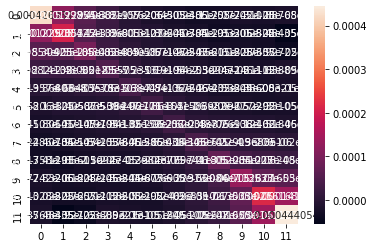

In [2]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(cov, annot = True, fmt = 'g')
plt.show()
#check diagonal-- if invertible/positive definite  np.zeros_like(cov) -- matrix with same dimentions

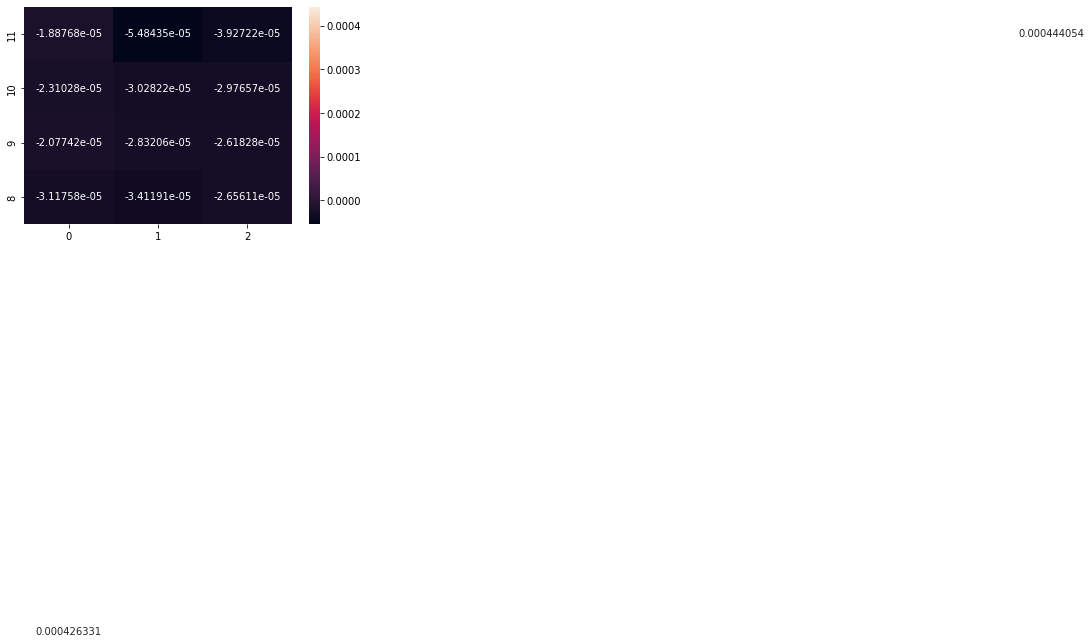

In [6]:
fig, ax = plt.subplots()
sn.heatmap(cov, annot = True, fmt = 'g', ax = ax)
ax.set_xlim(0, 3)
ax.set_ylim(8, 12)
plt.show()

#-2.07742e-5, -3.02822e-5, -3.92722e-5